In [ ]:
!pip install qiskit==0.46 qiskit-ibmq-provider pylatexenc qiskit-aer

In [ ]:
from qiskit import IBMQ
MY_API_TOKEN = '743a2e92feeae792763aa4ca74bbce26aae5058badf2edf21de7733d116ed93d25e688a5f248c31c4eadab31a1dd25e2e73e8bd52e1541e1331560b7ab93ed8a'
IBMQ.save_account(MY_API_TOKEN, overwrite=True)

<ipython-input-2-e8d1c7d08754>:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(MY_API_TOKEN, overwrite=True)
<ipython-input-2-e8d1c7d08754>:3: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(MY_API_TOKEN, overwrite=True)


# **Лабораторная работа №4**

**СУММАТОР В КВАНТОВЫХ СХЕМАХ**

Цель работы: ознакомление с выполнением простого сложения с помощью квантовых схем.


**Теория**

Как и в классических вычислениях, где вы можете комбинировать различные логические элементы (например, И, ИЛИ, исключающее ИЛИ и т. д.) для создания двоичных сумматоров, вы также можете создавать сумматоры с помощью квантовых схем.


# Задание
1. Изучить теоретический материал.
2. Произвести регистрацию на сайте https://quantum.ibm.com/ для получения токена API или дальнейшей работы с интерактивной средой IBM Quantum Experience
3. Средствами Qiskit или используя средства интерактивной среды IBM Quantum Experience https://quantum.ibm.com/composer/ , создать квантовую схему полного сумматора.

Полный сумматор принимает на вход два двоичных числа плюс бит переполнения, который мы назовем X.
Создайте полный сумматор с входными данными:

$A=1$, $B=0$, $X=1$
.

Таблица истинности для полного сумматора приведена ниже.

|A(input)|B(input)|X(carry input)|S(sum)|C(carry out)|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|1|0|
|0|1|0|1|0|
|0|1|1|0|1|
|1|0|0|1|0|
|1|0|1|0|1|
|1|1|0|0|1|
|1|1|1|1|1|

<ipython-input-3-bbac2dce11c9>:18: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend = Aer.get_backend('qasm_simulator')
<ipython-input-3-bbac2dce11c9>:19: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend, shots=1000)


{'0000': 1000}


/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


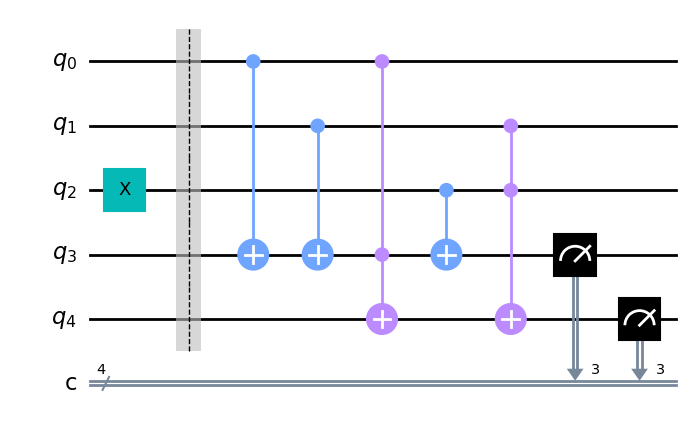

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[2])
circuit.barrier(qreg_q)
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[0], qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[4])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[3])

backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

circuit.draw(output='mpl')